In [1]:
from __future__ import division
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = stats.uniform.rvs(size=10000)

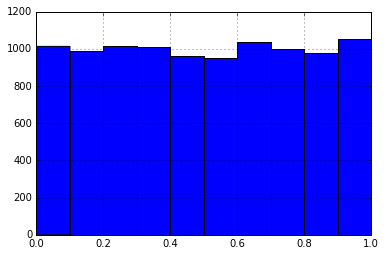

In [3]:
pd.Series(data).hist()

#### Chisq 

In [4]:
df = pd.DataFrame(data,columns=['uni'])
df['bin'] = pd.cut(df.uni,bins=np.arange(0,1.1,0.1),
                   include_lowest=True).astype(str)
df['n'] = 1

In [5]:
aux = df[['bin','n']].groupby('bin').sum().reset_index()
aux['e'] = len(df)/len(aux)
aux['chi'] = ((aux.n-aux.e)**2)/aux.e

In [6]:
#Estadígrafo de prueba
aux.chi.sum()

8.8079999999999998

In [7]:
# Probar valor crítico vs valor de estadígrafo de prueba
"""
 H0: Los datos son estadísticamente iguales a los valores esperados
 Ha: Los datos no son estadísticamente iguales de los valores esperados
"""
print "valor crítico: %.3f, valor estadígrafo: %.3f"% ( 
    stats.chi2.ppf(0.95,9),
    aux.chi.sum()
)
print "alpha=%.2f, p-value=%.2f"%(
    0.05,
    1-stats.chi2.cdf(aux.chi.sum(),9)
)
"""
Al ser el p-value mayor al nivel de significancia, 
no podemos rechazar H0, en consecuencia, no se puede concluir 
que las proporciones observadas son significativamente diferentes
de las proporciones esperadas. Si consideramos los valores del
estadígrafo en lugar de los p-value, tenemos que el estadígrafo
no cae en la zona de rechazo, por tanto, no puede rechazarse H0,
luego entonces, no podemos afirmar que los datos son estadísticamente
diferentes
""" 

#También se puede hacer la prueba directamente con scipy:

print stats.chisquare(f_obs=aux.n,f_exp=aux.e)

valor crítico: 16.919, valor estadígrafo: 8.808
alpha=0.05, p-value=0.46
Power_divergenceResult(statistic=8.8079999999999998, pvalue=0.45518309941910695)


#### KS

In [8]:
data = np.sort(stats.norm.rvs(size=10000))
N = len(data)
cdf = stats.norm.cdf(data)
D = np.abs(cdf-np.arange(1,N+1)/N).max()

In [9]:
"""
La prueba KS prueba la hipótesis:

H0: Los datos siguen la distribución especificada
Ha: Los datos no siguen la distribución especificada

Se calcula CDF para toda la muestra y se compara con la frecuencia relativa acumulada,
H0 se rechaza cuando p-value<alpha
"""

print "Estadígrafo de prueba: %.5f, p-value:%.5f"%(D,stats.kstwobign.sf(D * np.sqrt(N)))
#Scipy, cuenta con la prueba KS
print stats.kstest(data,cdf='norm',N=10000)

Estadígrafo de prueba: 0.00850, p-value:0.46543
KstestResult(statistic=0.0085992534792606046, pvalue=0.45036692640540676)
